#                                 House Price Prediction

## Importing the Necessary Libraries

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Loading the Necessary Dataset


In [52]:
House_data=pd.read_csv('Bengaluru_House_Data.csv')
House_data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


### Finding Shape

In [53]:
House_data.shape

(13320, 9)

### Statistical Summary 

In [54]:
House_data.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


### Information about the Dataframe

In [55]:
House_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [56]:
House_data.duplicated().sum()

529

In [57]:
House_data['area_type'].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [58]:
pd.set_option('display.max_rows',None)

In [59]:
House_data['society'].value_counts()

society
GrrvaGr    80
PrarePa    76
Sryalan    59
Prtates    59
GMown E    56
Prtanha    51
Bhmesy     51
Prityel    50
PrityTr    49
Prarkun    49
Dhalsh     47
IBityin    45
SNity S    40
Soresea    39
Adeatlm    37
Soitya     36
Rosha I    35
Bhe 2ko    35
SunceEs    34
SNnia E    33
JRrnauv    30
MenueNo    29
Prlla C    28
PuandHi    28
RothaVa    27
Prncyrn    27
GoAirej    26
Aklia R    26
Raard B    26
PhestOn    26
Puachal    26
DLhtsnd    24
Dieldli    24
Itelaa     24
Soazak     24
Sodgere    23
ViistLa    23
Brnia G    23
PualeSk    23
Shitt S    23
Soiewre    22
Prrtht     21
DLhtsan    21
RInceeg    21
Brway G    21
SoechHa    21
DLhtsen    20
AsastDe    20
Eladero    20
Shthi S    20
Prersis    19
Magiaya    19
Jaades     19
Klark L    19
PueraRi    18
Brica E    17
SSestth    17
SaireSa    17
Oreldhi    17
Prensya    16
KHatsFl    16
Baowsig    16
SSthamh    16
Sariaat    15
BrlisCo    15
NRosete    15
Sosisic    15
GolusLi    15
Tavenew    14
Taonte     14
PuziaVe    1

## Cleaning the Dataset


### Dropping the Unwanted Features and filling the null values

In [60]:
House_data.drop(columns=['availability','society'],inplace=True)
House_data.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [61]:
House_data['area_type'].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

### Data Mapping

##### Super built-up  Area = 1,
##### Built-up  Area = 2,
##### Plot  Area = 3,
##### Carpet  Area = 4

In [62]:
Data_Mapping=({'Super built-up  Area' : '1','Built-up  Area' : '2','Plot  Area' : '3','Carpet  Area' : '4'})
House_data['area_type_Numeric'] = House_data['area_type'].map(Data_Mapping)

In [63]:
House_data.head()

,area_type,location,size,total_sqft,bath,balcony,price,area_type_Numeric
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,3
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,2
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00,1


In [64]:
House_data['size'].value_counts(ascending=False)

size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

### Extracting digits from the String

In [ ]:
House_data['bhk'] = House_data['size'].str.split(' ').str.get(0)
House_data.head()

,area_type,location,size,total_sqft,bath,balcony,price,area_type_Numeric,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,3,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,2,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00,1,2


In [ ]:
House_data.dtypes

area_type             object
location              object
size                  object
total_sqft            object
bath                 float64
balcony              float64
price                float64
area_type_Numeric     object
bhk                   object
dtype: object

In [ ]:
House_data.drop_duplicates(inplace=True)

### Checking for null values present in the Dataset

In [ ]:
House_data.isnull().sum()

area_type              0
location               1
size                  16
total_sqft             0
bath                  72
balcony              603
price                  0
area_type_Numeric      0
bhk                   16
dtype: int64

### Dropping Missing Values rows which is very small

In [ ]:
House_data.dropna(subset=['location','bhk','bath'],inplace=True)
House_data.head()

,area_type,location,size,total_sqft,bath,balcony,price,area_type_Numeric,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,3,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,2,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00,1,2


### Datatype Conversion

In [ ]:
House_data['area_type_Numeric'] =  pd.to_numeric(House_data['area_type_Numeric'],errors='coerce')
House_data['bhk'] = House_data['bhk'].astype('int64')
House_data.head()

,area_type,location,size,total_sqft,bath,balcony,price,area_type_Numeric,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,3,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,2,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00,1,2


### Displays all the attributes Datatype

In [ ]:
House_data.dtypes

area_type             object
location              object
size                  object
total_sqft            object
bath                 float64
balcony              float64
price                float64
area_type_Numeric      int64
bhk                    int64
dtype: object

### Filling null values by the median value

In [ ]:
Balcony_median = House_data['balcony'].median()
House_data['balcony'] = House_data['balcony'].fillna(value = Balcony_median)
House_data.head()

,area_type,location,size,total_sqft,bath,balcony,price,area_type_Numeric,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,3,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,2,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00,1,2


In [ ]:
House_data.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

### Defining a function to retrieve all the string values (or) non-float values present in the attribute

In [ ]:
def it_is_float(x):
    try:
        float(x)
    except:
        return False
    return True

### To view all the values present like range '1133 - 1384' in this attribute

In [ ]:
df1 = House_data[-House_data['total_sqft'].apply(it_is_float)].head(10)

In [ ]:
df1.head(10)

,area_type,location,size,total_sqft,bath,balcony,price,area_type_Numeric,bhk
30,Super built-up Area,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,1,4
122,Super built-up Area,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,1,4
137,Super built-up Area,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,1,2
165,Super built-up Area,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,1,2
188,Super built-up Area,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,1,2
410,Super built-up Area,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500,1,1
549,Super built-up Area,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770,1,2
648,Built-up Area,Arekere,9 Bedroom,4125Perch,9.0,2.0,265.000,2,9
661,Super built-up Area,Yelahanka,2 BHK,1120 - 1145,2.0,0.0,48.130,1,2
672,Built-up Area,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,0.0,445.000,2,4


### Finding mean for the range values, extracting only digits from the string values and converting into float datatype


In [ ]:
import re

# Function to process total_sqft values
def process_total_sqft(value):
    if isinstance(value, str):
        if '-' in value:
            # Handle range values (e.g., '2100 - 2850')
            values = list(map(float, value.split('-')))
            return sum(values) / len(values)
        elif re.search(r'\d+', value):
            # Extract digits from strings (e.g., '34.56sq.meter')
            return float(re.search(r'\d+', value).group().replace('.', ''))
    try:
        # Return the value if it's already a valid float
        return float(value)
    except ValueError:
        # Return None for any values that can't be processed
        return None

# Apply the function to the total_sqft column
House_data['total_sqft'] = House_data['total_sqft'].apply(process_total_sqft)

In [ ]:
House_data.head()

,area_type,location,size,total_sqft,bath,balcony,price,area_type_Numeric,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,1,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,3,4
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,2,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,1,3
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,1,2


In [ ]:
House_data.dtypes

area_type             object
location              object
size                  object
total_sqft           float64
bath                 float64
balcony              float64
price                float64
area_type_Numeric      int64
bhk                    int64
dtype: object

## Feature Extraction and Dimensionaity Reduction


In [ ]:
#Creating a copy of the House_data dataframe
df = House_data.copy()

# In Real-Estate Price Per Square Feet is important
# Since price attribute is in lakh rupees (i.e) 39.07 = 39 lakhs and 7 thousand ,so multiplied with 1 lakh
df['Price_per_Sqft'] = df['price'] * 100000 / df['total_sqft']
df.head()

,area_type,location,size,total_sqft,bath,balcony,price,area_type_Numeric,bhk,Price_per_Sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,1,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,3,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,2,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,1,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,1,2,4250.000000


In [ ]:
df['Price_per_Sqft'].describe()

count    1.255600e+04
mean     1.334889e+04
std      2.660517e+05
min      2.678298e+02
25%      4.306338e+03
50%      5.500000e+03
75%      7.458476e+03
max      2.000000e+07
Name: Price_per_Sqft, dtype: float64

In [ ]:
# Checking the datatype of all the attributes
df.dtypes

area_type             object
location              object
size                  object
total_sqft           float64
bath                 float64
balcony              float64
price                float64
area_type_Numeric      int64
bhk                    int64
Price_per_Sqft       float64
dtype: object

In [ ]:
#Now we need to  handle the 'location' attribute

# To identify unique locations
location_unique = df.location.value_counts()
location_unique.head()

location
Whitefield         508
Sarjapur  Road     361
Electronic City    280
Thanisandra        228
Kanakpura Road     224
Name: count, dtype: int64

### Since location is a categorical variable we are categorising 'location' <= 10 as 'other' to make it short 

In [ ]:
# Since most of the values lies between location_count less than 10 
location_unique[location_unique <= 10].count()

1072

In [ ]:
# Gather location_count <= 10 (i.e) unique_location and storing it in 'location_unique_less_than_10'
location_unique_less_than_10 = location_unique[location_unique <= 10]
location_unique_less_than_10 

location
ITPL                                                  10
Dairy Circle                                          10
Kalkere                                               10
BTM 1st Stage                                         10
Sadashiva Nagar                                       10
1st Block Koramangala                                 10
Nagappa Reddy Layout                                  10
Naganathapura                                         10
BEML Layout                                           10
Ganga Nagar                                           10
Vasanthapura                                          10
Marsur                                                10
Gunjur Palya                                          10
Dodsworth Layout                                      10
Pattandur Agrahara                                    10
Narayanapura                                          10
Ejipura                                                9
Jakkur Plantation     

In [ ]:
df['location'] = df['location'].apply(lambda x : 'other' if x in location_unique_less_than_10 else x)
df['location'].head(10)

0    Electronic City Phase II
1            Chikka Tirupathi
2                 Uttarahalli
3          Lingadheeranahalli
4                    Kothanur
5                  Whitefield
6            Old Airport Road
7                Rajaji Nagar
8                Marathahalli
9                       other
Name: location, dtype: object

In [ ]:
df.head(10)

,area_type,location,size,total_sqft,bath,balcony,price,area_type_Numeric,bhk,Price_per_Sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,1,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,3,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,2,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,1,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,1,2,4250.000000
5,Super built-up Area,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,1,2,3247.863248
6,Super built-up Area,Old Airport Road,4 BHK,2732.0,4.0,2.0,204.00,1,4,7467.057101
7,Super built-up Area,Rajaji Nagar,4 BHK,3300.0,4.0,2.0,600.00,1,4,18181.818182
8,Super built-up Area,Marathahalli,3 BHK,1310.0,3.0,1.0,63.25,1,3,4828.244275
9,Plot Area,other,6 Bedroom,1020.0,6.0,2.0,370.00,3,6,36274.509804


In [ ]:
# Checking for the total no. of rows and columns present in the dataset
df.shape

(12556, 10)

## Exploratory Data Analysis

### Scatter Plot

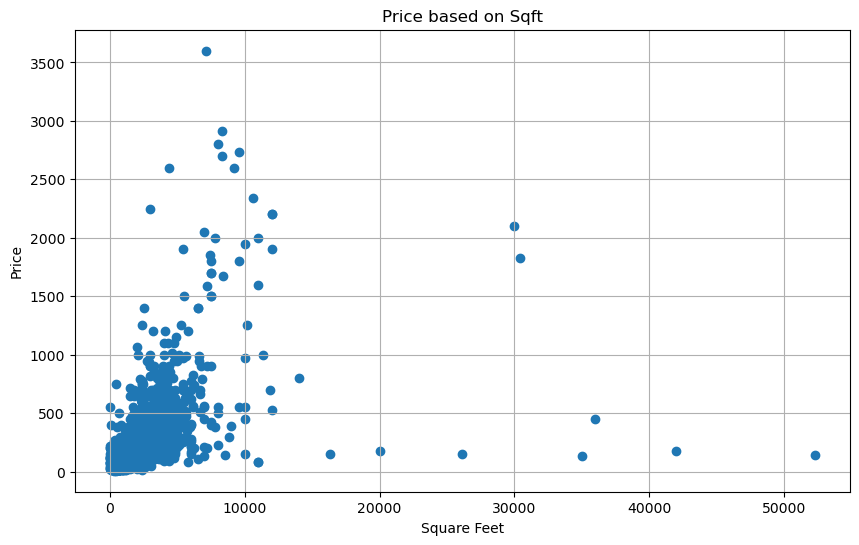

In [ ]:
# Scatter plot for Square_Feet vs Price
plt.figure(figsize = (10,6))
plt.scatter(x = df['total_sqft'], y = df['price'])
plt.title('Price based on Sqft')
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.grid(True)
plt.show()

### Bar Plot

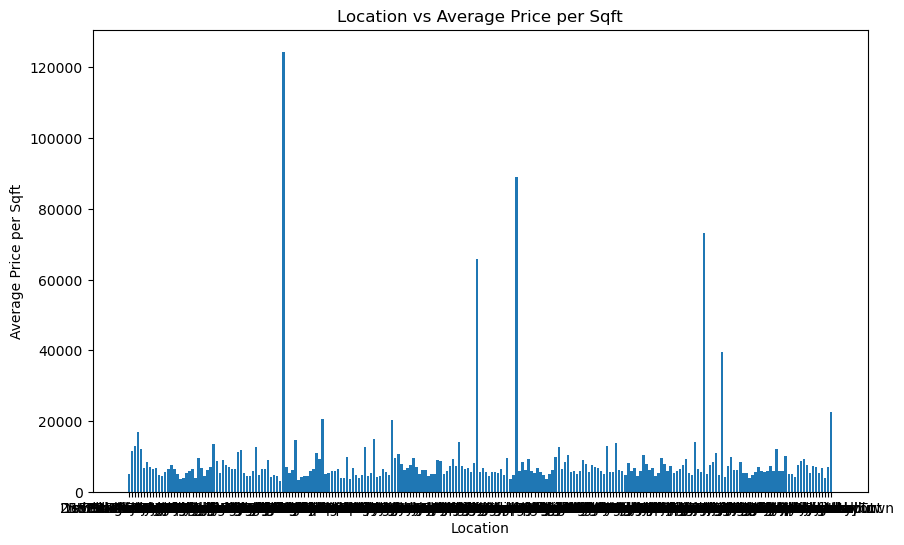

In [ ]:
# Calculating the average Price_per_Sqft for each location

location_avg_price = df.groupby('location')['Price_per_Sqft'].mean().reset_index()
plt.figure(figsize=(10,6))
plt.bar(location_avg_price['location'], location_avg_price['Price_per_Sqft'])
plt.title('Location vs Average Price per Sqft')
plt.xlabel('Location')
plt.ylabel('Average Price per Sqft')
plt.show()

### Box Plot

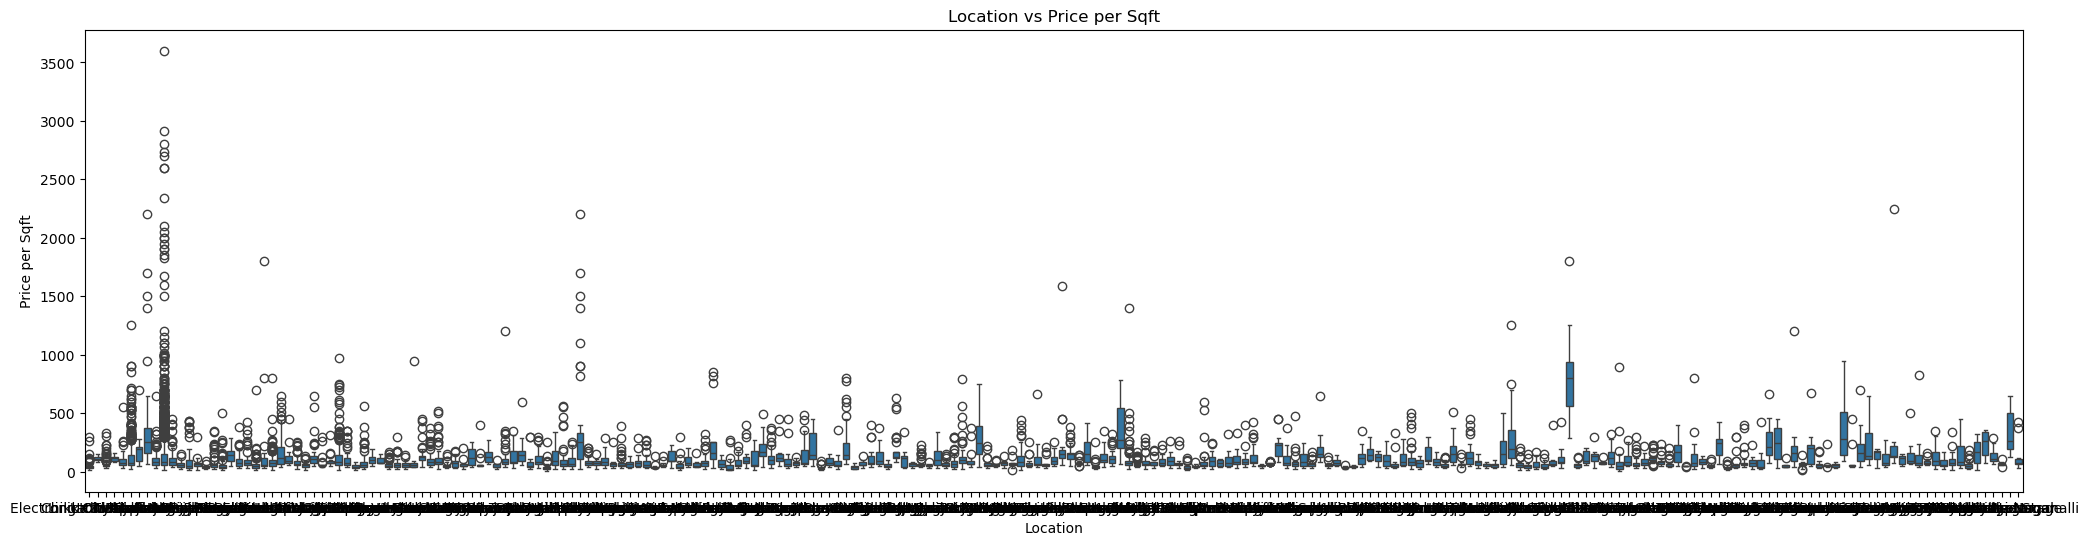

In [ ]:
# Distribution of Price_per_Sqft for each location 

plt.figure(figsize=(25, 6))
sns.boxplot(x = df['location'], y = df['price'])
plt.title('Location vs Price per Sqft')
plt.xlabel('Location')
plt.ylabel('Price per Sqft')
plt.show()

### Pair Plot

<Figure size 1000x600 with 0 Axes>

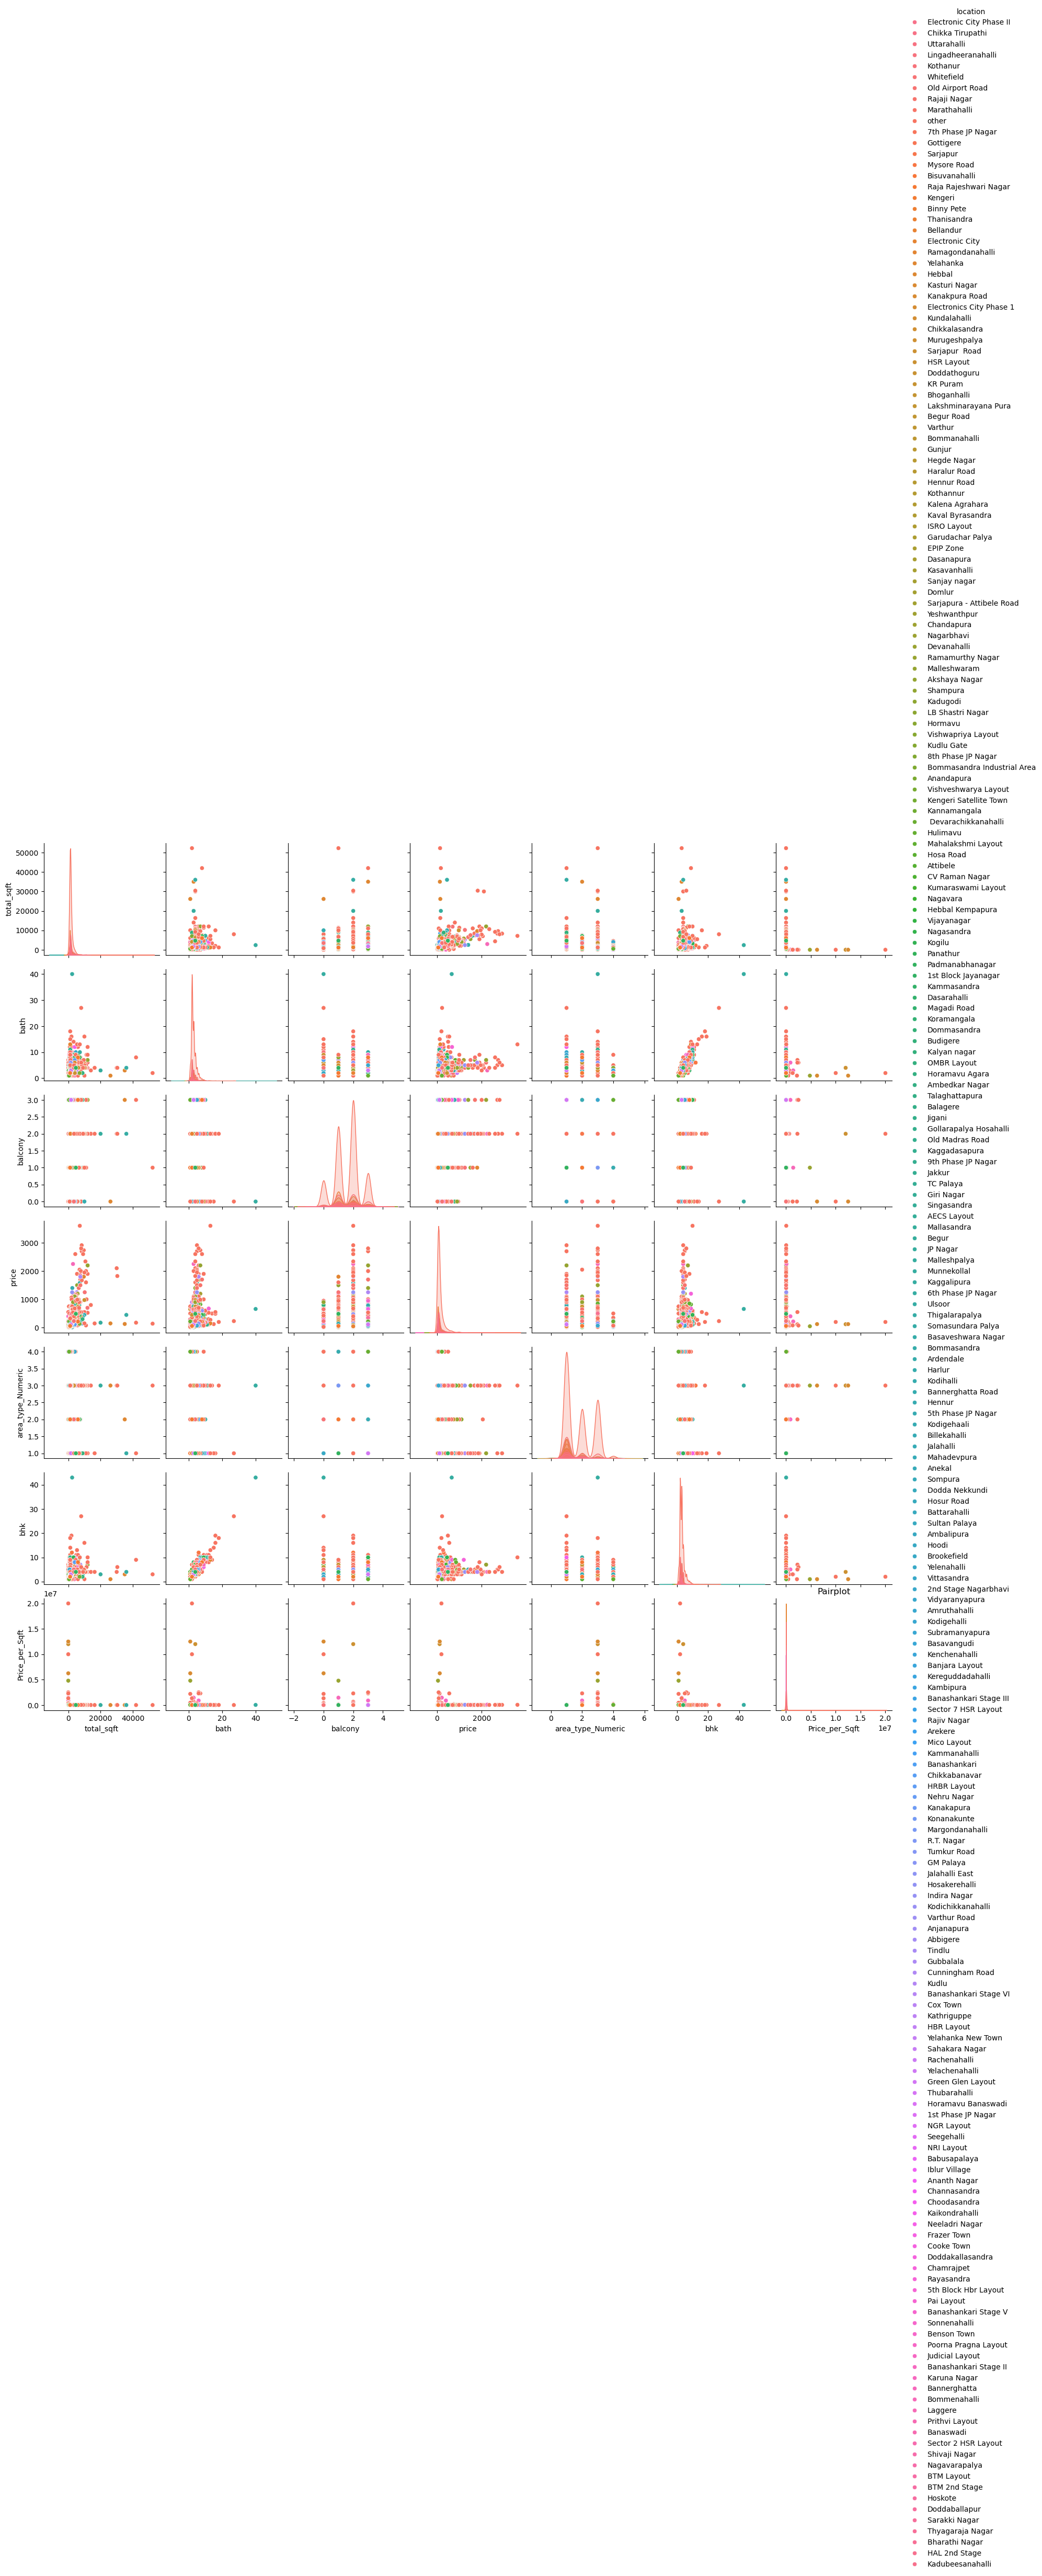

In [ ]:
plt.figure(figsize = (10,6))
sns.pairplot(df, hue = 'location',diag_kind = 'kde')
plt.title("Pairplot")
plt.show()

#### Finding Correlation

In [ ]:
correlation_matrix = df.drop(columns = ['area_type','location','size']).corr()
print('correlation_matrix:',correlation_matrix)

correlation_matrix:                    total_sqft      bath   balcony     price  \
total_sqft           1.000000  0.385972  0.150510  0.569776   
bath                 0.385972  1.000000  0.204376  0.451890   
balcony              0.150510  0.204376  1.000000  0.121929   
price                0.569776  0.451890  0.121929  1.000000   
area_type_Numeric    0.091631  0.344021 -0.107889  0.237568   
bhk                  0.340257  0.899497  0.189629  0.392922   
Price_per_Sqft      -0.027967  0.002144 -0.012147  0.018739   

                   area_type_Numeric       bhk  Price_per_Sqft  
total_sqft                  0.091631  0.340257       -0.027967  
bath                        0.344021  0.899497        0.002144  
balcony                    -0.107889  0.189629       -0.012147  
price                       0.237568  0.392922        0.018739  
area_type_Numeric           1.000000  0.378517        0.051961  
bhk                         0.378517  1.000000       -0.000205  
Price_per_Sqft      

### Heatmap of the Correlation Matrix

Text(0.5, 1.0, 'Corelation Heatmap')

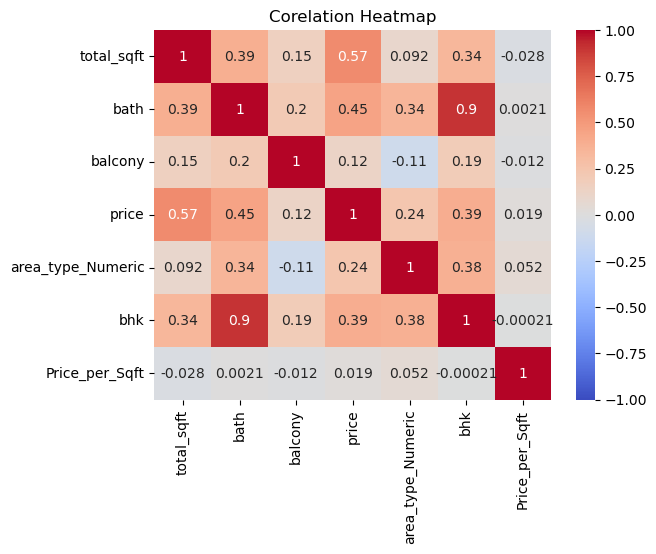

In [ ]:
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.title('Corelation Heatmap')

In [ ]:
df.head()

,area_type,location,size,total_sqft,bath,balcony,price,area_type_Numeric,bhk,Price_per_Sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,1,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,3,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,2,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,1,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,1,2,4250.000000


In [ ]:
numerical_cols = df[['bhk','total_sqft','bath','balcony','price']]
numerical_cols.head()

,bhk,total_sqft,bath,balcony,price
0,2,1056.0,2.0,1.0,39.07
1,4,2600.0,5.0,3.0,120.00
2,3,1440.0,2.0,3.0,62.00
3,3,1521.0,3.0,1.0,95.00
4,2,1200.0,2.0,1.0,51.00


In [ ]:
numerical_cols.shape

(12556, 5)

In [ ]:
numerical_cols.dtypes

bhk             int64
total_sqft    float64
bath          float64
balcony       float64
price         float64
dtype: object

### Removing Outliers 

In [ ]:
# Z-Score
import scipy
import scipy.stats as stats
z_scores = stats.zscore(numerical_cols)
print("Before Removing Outliers",numerical_cols.shape)
threshold = 3
outliers = numerical_cols[(z_scores > threshold).any(axis = 1)]
# print(outliers.head())
numerical_cols = numerical_cols[(z_scores <= threshold).all(axis=1)]
# print(numerical_cols.head())
print("Size after removing outliers", numerical_cols.shape)

Before Removing Outliers (12556, 5)
Size after removing outliers (12037, 5)


In [ ]:
numerical_cols.shape

(12037, 5)

### Performing One-Hot encoding on Categorical Values

In [ ]:
df = df.drop(columns = ['area_type','size','Price_per_Sqft','bhk','total_sqft','bath','balcony','price'],axis=1)
df.head()

,location,area_type_Numeric
0,Electronic City Phase II,1
1,Chikka Tirupathi,3
2,Uttarahalli,2
3,Lingadheeranahalli,1
4,Kothanur,1


In [ ]:
df = pd.concat([df,numerical_cols],axis = 1)
df.head()

,location,area_type_Numeric,bhk,total_sqft,bath,balcony,price
0,Electronic City Phase II,1,2.0,1056.0,2.0,1.0,39.07
1,Chikka Tirupathi,3,4.0,2600.0,5.0,3.0,120.00
2,Uttarahalli,2,3.0,1440.0,2.0,3.0,62.00
3,Lingadheeranahalli,1,3.0,1521.0,3.0,1.0,95.00
4,Kothanur,1,2.0,1200.0,2.0,1.0,51.00


In [ ]:
# Creating dummies for the 'location' attribute
dummies = pd.get_dummies(df['location'])
dummies.drop(columns=['other'],axis=1,inplace=True)
dummies.head()

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [65]:
# Converting Boolean into numeric
dummies = dummies.astype('int64')
dummies.head()

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
df1 = pd.concat([df,dummies],axis = 1)
df1.head()

,location,area_type_Numeric,bhk,total_sqft,bath,balcony,price,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Electronic City Phase II,1,2.0,1056.0,2.0,1.0,39.07,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Chikka Tirupathi,3,4.0,2600.0,5.0,3.0,120.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Uttarahalli,2,3.0,1440.0,2.0,3.0,62.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Lingadheeranahalli,1,3.0,1521.0,3.0,1.0,95.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Kothanur,1,2.0,1200.0,2.0,1.0,51.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
df1 = df1.drop(columns=['location'],axis = 1)
df1.head()

,area_type_Numeric,bhk,total_sqft,bath,balcony,price,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,2.0,1056.0,2.0,1.0,39.07,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,4.0,2600.0,5.0,3.0,120.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,3.0,1440.0,2.0,3.0,62.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,3.0,1521.0,3.0,1.0,95.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2.0,1200.0,2.0,1.0,51.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
# Checking the Shape of the dataframe d1
df1.shape

(12556, 238)

In [69]:
df1.isnull().sum()

area_type_Numeric                0
bhk                            519
total_sqft                     519
bath                           519
balcony                        519
price                          519
 Devarachikkanahalli             0
1st Block Jayanagar              0
1st Phase JP Nagar               0
2nd Stage Nagarbhavi             0
5th Block Hbr Layout             0
5th Phase JP Nagar               0
6th Phase JP Nagar               0
7th Phase JP Nagar               0
8th Phase JP Nagar               0
9th Phase JP Nagar               0
AECS Layout                      0
Abbigere                         0
Akshaya Nagar                    0
Ambalipura                       0
Ambedkar Nagar                   0
Amruthahalli                     0
Anandapura                       0
Ananth Nagar                     0
Anekal                           0
Anjanapura                       0
Ardendale                        0
Arekere                          0
Attibele            

In [70]:
bhk = df['bhk'].median()
total_sqft= df['total_sqft'].median()
bath = df['bath'].median()
balcony = df['balcony'].median()
price = df['price'].median()
df1.bhk = df1.bhk.fillna(value = bhk)
df1.total_sqft = df1.total_sqft.fillna(value = total_sqft)
df1.bath = df1.bath.fillna(value = bath)
df1.balcony = df1.balcony.fillna(value = balcony)
df1.price = df1.price.fillna(value = price)
df1.head()

,area_type_Numeric,bhk,total_sqft,bath,balcony,price,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,2.0,1056.0,2.0,1.0,39.07,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,4.0,2600.0,5.0,3.0,120.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,3.0,1440.0,2.0,3.0,62.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,3.0,1521.0,3.0,1.0,95.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2.0,1200.0,2.0,1.0,51.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
df1.isnull().sum()

area_type_Numeric              0
bhk                            0
total_sqft                     0
bath                           0
balcony                        0
price                          0
 Devarachikkanahalli           0
1st Block Jayanagar            0
1st Phase JP Nagar             0
2nd Stage Nagarbhavi           0
5th Block Hbr Layout           0
5th Phase JP Nagar             0
6th Phase JP Nagar             0
7th Phase JP Nagar             0
8th Phase JP Nagar             0
9th Phase JP Nagar             0
AECS Layout                    0
Abbigere                       0
Akshaya Nagar                  0
Ambalipura                     0
Ambedkar Nagar                 0
Amruthahalli                   0
Anandapura                     0
Ananth Nagar                   0
Anekal                         0
Anjanapura                     0
Ardendale                      0
Arekere                        0
Attibele                       0
BTM 2nd Stage                  0
BTM Layout

In [72]:
#Loading only Independent variables to 'x'
X = df1.drop(columns = ['price'],axis = 1)
X.head()

,area_type_Numeric,bhk,total_sqft,bath,balcony,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,2.0,1056.0,2.0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,4.0,2600.0,5.0,3.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,3.0,1440.0,2.0,3.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,3.0,1521.0,3.0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2.0,1200.0,2.0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
#Loading only the target (or) Prediction Variable to 'y'
y = df1['price']
y.head()

0     39.07
1    120.00
2     62.00
3     95.00
4     51.00
Name: price, dtype: float64

In [74]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2

In [75]:
# ## Applying SelecKBest Algorithm
# ordered_rank_features =  SelectKBest(score_func=chi2 ,k=8)
# ordered_features= ordered_rank_features.fit(X,y)

In [76]:
df1.dtypes

area_type_Numeric                int64
bhk                            float64
total_sqft                     float64
bath                           float64
balcony                        float64
price                          float64
 Devarachikkanahalli             int64
1st Block Jayanagar              int64
1st Phase JP Nagar               int64
2nd Stage Nagarbhavi             int64
5th Block Hbr Layout             int64
5th Phase JP Nagar               int64
6th Phase JP Nagar               int64
7th Phase JP Nagar               int64
8th Phase JP Nagar               int64
9th Phase JP Nagar               int64
AECS Layout                      int64
Abbigere                         int64
Akshaya Nagar                    int64
Ambalipura                       int64
Ambedkar Nagar                   int64
Amruthahalli                     int64
Anandapura                       int64
Ananth Nagar                     int64
Anekal                           int64
Anjanapura               

### Model Building

#### Importing train_test_split from sklearn


In [77]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import randint

### Importing RandomForestRegressor from sklearn

In [78]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the RandomForestRegressor model
model2 = RandomForestRegressor(n_estimators=100, random_state=42)

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(estimator=model2, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Train the model with the best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
predictions = best_model.predict(X_test_scaled)

# Evaluate model performance
model_score = best_model.score(X_train_scaled, y_train)
test_score = r2_score(y_test, predictions)

print(f"Model Score on Training Data: {model_score:.2f}")
print(f"R^2 Score on Test Data: {test_score:.2f}")


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
Best Score: 0.7198794820290555
Model Score on Training Data: 0.89
R^2 Score on Test Data: 0.69


In [79]:
df1.head()

,area_type_Numeric,bhk,total_sqft,bath,balcony,price,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,2.0,1056.0,2.0,1.0,39.07,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,4.0,2600.0,5.0,3.0,120.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,3.0,1440.0,2.0,3.0,62.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,3.0,1521.0,3.0,1.0,95.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2.0,1200.0,2.0,1.0,51.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
df1.to_csv('filtered_house_price_prediction.csv')

### Prediction

In [88]:
def prediction(area_type_Numeric,bhk,total_sqft,bath,balcony,location):
        loc_index = np.where(X.columns == location)[0][0]
        
        x = np.zeros(len(X.columns))
        x[0]=area_type_Numeric
        x[1]=bhk
        x[2]=total_sqft
        x[3]=bath
        x[4]=balcony
        
        
        if loc_index >= 0:
            x[loc_index] = 1
        return best_model.predict([x])[0]

In [89]:
prediction(1, 2.0, 1056.0, 2.0, 1.0, 'Electronic City Phase II')

249.22871907500706